In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from geopy.distance import geodesic

In [2]:
path =r'/Users/thaliagiraldo/Library/Mobile Documents/com~apple~CloudDocs/CareerFoundry/Immersion /Lesson 6'

In [3]:
df = pd.read_csv(os.path.join(path, 'divvy_cleaned.csv'), index_col = False) 

Data Cleaning

In [4]:
df.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,trip_distance_miles
0,0,4EAD8F1AD547356B,electric_bike,2023-11-30 21:50:00,2023-11-30 22:13:00,Millennium Park,13008,Pine Grove Ave & Waveland Ave,TA1307000150,41.881101,-87.624082,41.949473,-87.646453,member,0 days 00:23:00,4.857630
1,1,6322270563BF5470,electric_bike,2023-11-03 09:44:00,2023-11-03 10:17:00,Broadway & Sheridan Rd,13323,Broadway & Sheridan Rd,13323,41.952868,-87.650035,41.952833,-87.649993,member,0 days 00:33:00,0.003233
2,2,B37BDE091ECA38E0,electric_bike,2023-11-30 11:39:00,2023-11-30 11:40:00,State St & Pearson St,TA1307000061,State St & Pearson St,TA1307000061,41.897533,-87.628694,41.897448,-87.628722,member,0 days 00:01:00,0.006015
3,3,CF0CA5DD26E4F90E,classic_bike,2023-11-08 10:01:00,2023-11-08 10:27:00,Theater on the Lake,TA1308000001,Theater on the Lake,TA1308000001,41.926277,-87.630834,41.926277,-87.630834,member,0 days 00:26:00,0.000000
4,4,EB8381AA641348DB,classic_bike,2023-11-03 16:20:00,2023-11-03 16:54:00,Theater on the Lake,TA1308000001,Theater on the Lake,TA1308000001,41.926277,-87.630834,41.926277,-87.630834,member,0 days 00:34:00,0.000000


In [5]:
#Create separate columns for TRIP start date, end date, start time, end time

df['started_at'] = pd.to_datetime(df['started_at'], format='%Y-%m-%d %H:%M:%S')
df['ended_at'] = pd.to_datetime(df['ended_at'], format='%Y-%m-%d %H:%M:%S')

df['trip_date_start'] = df['started_at'].dt.date['trip_start_time'] = df['started_at'].dt.date
df['trip_date_end'] = df['ended_at'].dt.date['trip_end_time'] = df['ended_at'].dt.date

/var/folders/t7/fy2gbqpj7r54t9fzj4_6j2v80000gn/T/ipykernel_63060/168575066.py:6: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  df['trip_date_start'] = df['started_at'].dt.date['trip_start_time'] = df['started_at'].dt.date
/var/folders/t7/fy2gbqpj7r54t9fzj4_6j2v80000gn/T/ipykernel_63060/168575066.py:6: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  df['trip_date_start'] = df['started_at'].dt.date['trip_start_time'] = df['started_at'].dt.date
/var/folders/t7/fy2gbqpj7r54t9fzj4_6j2v80000gn/T/ipykernel_63060/168575066.py:7: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  df['trip_date_end'] = df['ended_at'].dt.date['trip_end_time'] = df['ended_at'].dt.date
/var/folders/t7/fy2gbqpj7r54t9fzj4_6j2v

In [6]:
#Change to 12 hour time from military
df['start_time'] = pd.to_datetime(df['started_at']).dt.strftime('%I:%M %p')

df['end_time'] = pd.to_datetime(df['ended_at']).dt.strftime('%I:%M %p')

In [7]:
# Create a new column 'ride_day_of_week'
df['ride_day_of_week'] = df['started_at'].dt.day_name()

In [8]:
#'ride_day_of_week_numeric' column contains the day of the week as integers
df['ride_day_of_week_numeric'] = df['started_at'].dt.dayofweek


In [9]:
#'Hour_start_time' column contains the hour of the trip start time

df['hour_start_time'] = df['started_at'].dt.hour


In [10]:
#Assigning codes to categorical values

mapping = {'classic_bike': 1, 'electric_bike': 2}

# Create a new column 'rideable_type_code' based on the mapping
df['rideable_type_code'] = df['rideable_type'].map(mapping)


Exploratory Analysis

3-Create a correlation matrix

In [11]:
##3A. Create a correlation matrix heatmap (colored)
##3B. Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

In [12]:
#For easier manipulation, before making map, I am changing trip duration datatype to timedelta and to view in minutes
# Convert 'trip_duration' to timedelta
df['trip_duration'] = pd.to_timedelta(df['trip_duration'])

# Convert 'trip_duration' to minutes
df['trip_duration'] = df['trip_duration'].dt.total_seconds() / 60

In [13]:
#Creating sub df for the map with the variables I want to include
sub = df[['trip_duration', 'trip_distance_miles', 'ride_day_of_week_numeric', 'hour_start_time', 'rideable_type_code', 'start_lat',	'start_lng','end_lat','end_lng']]

In [14]:
# Create a correlation matrix using pandas

sub.corr()

,trip_duration,trip_distance_miles,ride_day_of_week_numeric,hour_start_time,rideable_type_code,start_lat,start_lng,end_lat,end_lng
trip_duration,1.000000,0.094595,0.015211,0.000759,-0.040593,-0.006565,0.009660,-0.564923,0.565326
trip_distance_miles,0.094595,1.000000,0.019762,-0.005265,0.089626,0.107531,-0.113632,0.121774,-0.122940
ride_day_of_week_numeric,0.015211,0.019762,1.000000,-0.013194,-0.019191,0.046262,-0.008664,-0.004923,0.006479
hour_start_time,0.000759,-0.005265,-0.013194,1.000000,0.002105,-0.005638,0.011322,0.000024,0.000886
rideable_type_code,-0.040593,0.089626,-0.019191,0.002105,1.000000,0.091598,-0.172279,0.035282,-0.033642
start_lat,-0.006565,0.107531,0.046262,-0.005638,0.091598,1.000000,-0.588598,0.042807,-0.014988
start_lng,0.009660,-0.113632,-0.008664,0.011322,-0.172279,-0.588598,1.000000,-0.026298,0.014333
end_lat,-0.564923,0.121774,-0.004923,0.000024,0.035282,0.042807,-0.026298,1.000000,-0.999503
end_lng,0.565326,-0.122940,0.006479,0.000886,-0.033642,-0.014988,0.014333,-0.999503,1.000000


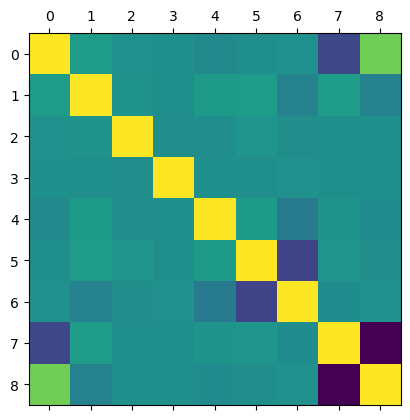

In [15]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()

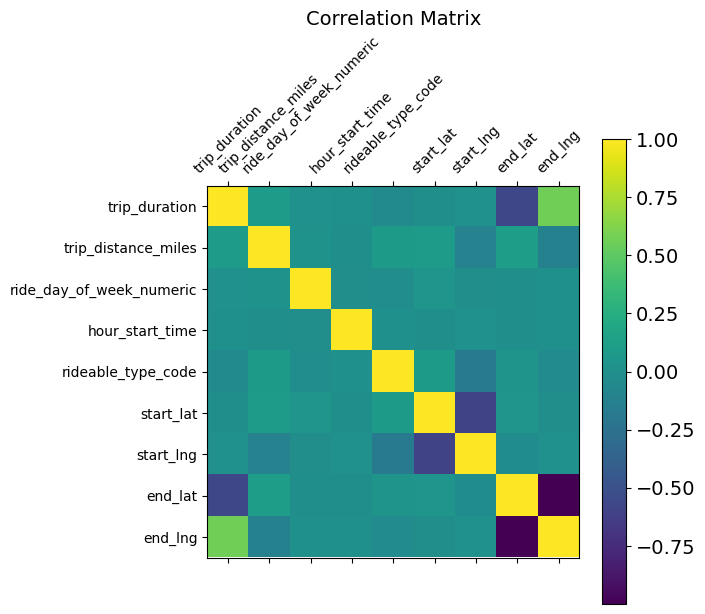

In [16]:
# Set up the matplotlib figure for sub
f = plt.figure(figsize=(6, 6))
plt.matshow(sub.corr(), fignum=f.number)  # type of plot

# Adjust ticks and labels based on the number of columns in 'sub'
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=10, rotation=45)  # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=10)  # y axis labels

# Add a colorbar
cb = plt.colorbar()  # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14)  # add font size

# Add title
plt.title('Correlation Matrix', fontsize=14)  # add title

# Show the plot
plt.show()

#Note - I realized that including lost/stolen values and negative values would likely skew data especially since this map assesses ridership details. I created a df that excluded those two types of data

In [17]:
#Create a seaborn map & df exlcuding the lost/stolen values 
#Create map & df without negative values
df.columns

Index(['Unnamed: 0', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'trip_duration', 'trip_distance_miles',
       'trip_date_start', 'trip_date_end', 'start_time', 'end_time',
       'ride_day_of_week', 'ride_day_of_week_numeric', 'hour_start_time',
       'rideable_type_code'],
      dtype='object')

In [18]:
# Now 'sub' contains only rows where latitude and longitude are not missing and not equal to 0.0
#retains rows with valid coordinates
sub_nomissingbikes = df[(df['end_lat'].notna()) & (df['end_lat'] != 0.0) & (df['end_lng'].notna()) & (df['end_lng'] != 0.0)]

# Create a map df that has all columns but omits rows with missing lat/long coordinates. these values are used for map
sub_map_nomissing = sub_nomissingbikes[['trip_duration', 'trip_distance_miles', 'ride_day_of_week_numeric', 'hour_start_time', 'rideable_type_code', 'start_lat', 'start_lng', 'end_lat', 'end_lng']]


In [19]:
# Remove rows with negative 'trip_duration' from all df
#This information isn't valuable in any stage and should have been removed in earlier cleaning!
sub_nomissingbikes = sub_nomissingbikes[sub_nomissingbikes['trip_duration'] >= 0]
df = df[df['trip_duration']>=0]
sub_map_nomissing = sub_map_nomissing[sub_map_nomissing['trip_duration'] >= 0]


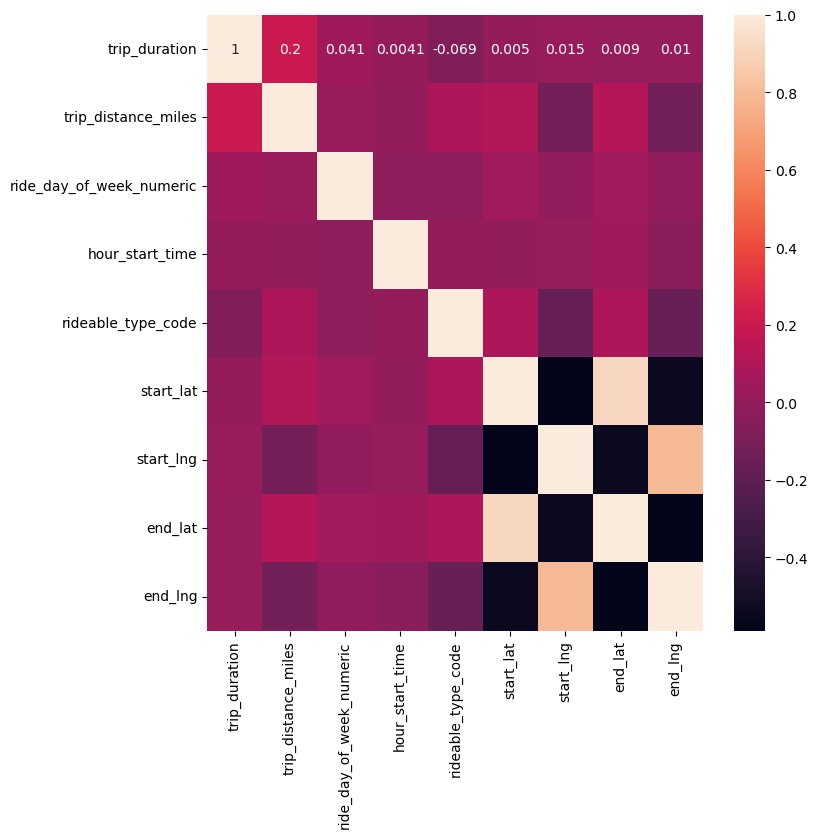

In [20]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(8,8))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub_map_nomissing.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

3. Discussion - Correlation 

In [21]:
#Create a correlation matrix heatmap (colored).
#Discuss what the coefficients in the plot mean in terms of the relationships between the variables.
##There is a relationship between the following variables: weak positive relationship between trip distance miles and the rideable type. There's nothing else here that has a relationship besides longittude and latitude. There is also a weak positive relationship between trip duration and distancce miles. 
##That is surprising because I think that relationship should be higher. I'd assume the longer the trip, the more distance someone rides but that's probably not the case because some people may be doing round trips or making multiple stops but around the same area.


4 - Create a Scatterplot

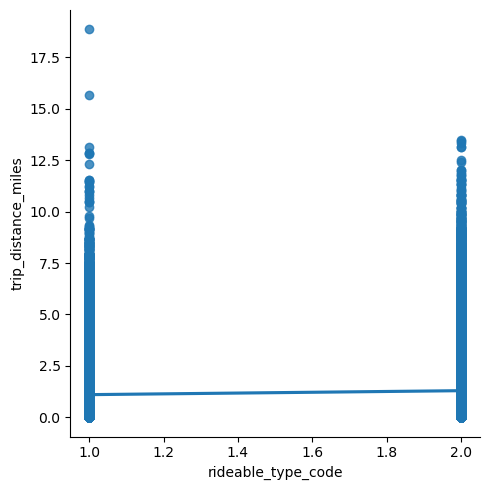

In [22]:
# Create a scatterplot for the "trip distance miles" and "rideable type" columns in seaborn. Since I'm interested in people who are traveling and not lost/stolen bikes. I'm using the sub df
# 1 = electric bikes, 2 = classic bike
#Users riding electric bikes travel longer distances 
sns.lmplot(x = 'rideable_type_code', y = 'trip_distance_miles', data = sub_nomissingbikes)

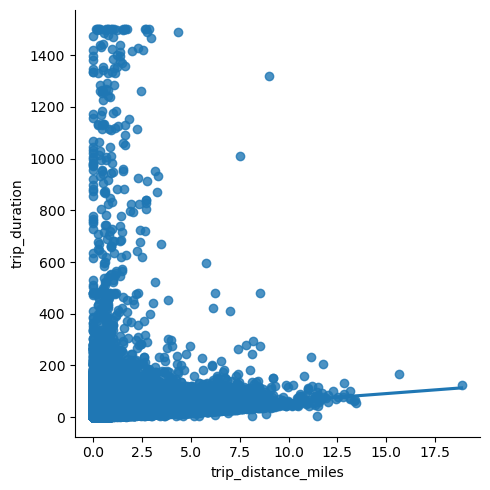

In [23]:
# Create a scatterplot for the "trip distance miles" and "trip_duration" columns in seaborn.
#There are 0 mile trips that have high trip duration. This is surprising so I am going to check how many of these there are to see if it's an anonymoly.
#With roundtrip rides counting actual distance may be a challenge. The distance may come out as 0 even though the person may have done multiple miles of riding based on hours with bike
sns.lmplot(x ='trip_distance_miles', y ='trip_duration', data = sub_nomissingbikes)

In [24]:
#99% of rides are under an hour. Made a df for high duration rides 
high_duration = sub_nomissingbikes[sub_nomissingbikes['trip_duration'] >= 60]
high_duration

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,...,trip_duration,trip_distance_miles,trip_date_start,trip_date_end,start_time,end_time,ride_day_of_week,ride_day_of_week_numeric,hour_start_time,rideable_type_code
6,6,1763B0A2778C185E,classic_bike,2023-11-09 11:55:00,2023-11-09 13:08:00,Millennium Park,13008,Millennium Park,13008,41.881032,...,73.0,0.000000,2023-11-09,2023-11-09,11:55 AM,01:08 PM,Thursday,3,11,1
24,24,FCC7A68E7AA5680B,classic_bike,2023-11-05 16:12:00,2023-11-05 17:42:00,Theater on the Lake,TA1308000001,Theater on the Lake,TA1308000001,41.926277,...,90.0,0.000000,2023-11-05,2023-11-05,04:12 PM,05:42 PM,Sunday,6,16,1
25,25,4CA65C061A14C915,classic_bike,2023-11-05 16:13:00,2023-11-05 17:42:00,Theater on the Lake,TA1308000001,Theater on the Lake,TA1308000001,41.926277,...,89.0,0.000000,2023-11-05,2023-11-05,04:13 PM,05:42 PM,Sunday,6,16,1
82,82,DB57CB53F09C86F6,classic_bike,2023-11-23 12:01:00,2023-11-23 13:34:00,Theater on the Lake,TA1308000001,Theater on the Lake,TA1308000001,41.926277,...,93.0,0.000000,2023-11-23,2023-11-23,12:01 PM,01:34 PM,Thursday,3,12,1
83,83,79C8FBF95796A972,classic_bike,2023-11-11 21:32:00,2023-11-11 22:42:00,Pine Grove Ave & Waveland Ave,TA1307000150,Pine Grove Ave & Waveland Ave,TA1307000150,41.949473,...,70.0,0.000000,2023-11-11,2023-11-11,09:32 PM,10:42 PM,Saturday,5,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361984,361984,DA9837371C23EA8A,classic_bike,2023-11-19 14:16:00,2023-11-19 15:19:00,Wabash Ave & Cermak Rd,TA1305000001,Mies van der Rohe Way & Chicago Ave,13338,41.852619,...,63.0,3.068903,2023-11-19,2023-11-19,02:16 PM,03:19 PM,Sunday,6,14,1
362055,362055,AB522B315A801514,classic_bike,2023-11-03 12:52:00,2023-11-03 15:26:00,Loomis St & Lexington St,13332,900 W Harrison St,13028,41.872229,...,154.0,0.621091,2023-11-03,2023-11-03,12:52 PM,03:26 PM,Friday,4,12,1
362407,362407,C2FEED1EF103A640,classic_bike,2023-11-04 07:27:00,2023-11-04 08:49:00,Sheridan Rd & Montrose Ave,TA1307000107,McCormick Blvd & Devon Ave,23101,41.961670,...,82.0,3.805334,2023-11-04,2023-11-04,07:27 AM,08:49 AM,Saturday,5,7,1
362465,362465,5ED7021620ECBF6C,electric_bike,2023-11-28 01:45:00,2023-11-28 06:03:00,Manor Ave & Leland Ave,KA1504000127,Virginia Ave & Catalpa Ave,441,41.965919,...,258.0,1.078026,2023-11-28,2023-11-28,01:45 AM,06:03 AM,Tuesday,1,1,2


In [25]:
#99% of rides are under an hour. Made a df for high duration rides 
lessthan60mins_duration = sub_nomissingbikes[sub_nomissingbikes['trip_duration'] < 60]
lessthan60mins_duration

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,...,trip_duration,trip_distance_miles,trip_date_start,trip_date_end,start_time,end_time,ride_day_of_week,ride_day_of_week_numeric,hour_start_time,rideable_type_code
0,0,4EAD8F1AD547356B,electric_bike,2023-11-30 21:50:00,2023-11-30 22:13:00,Millennium Park,13008,Pine Grove Ave & Waveland Ave,TA1307000150,41.881101,...,23.0,4.857630,2023-11-30,2023-11-30,09:50 PM,10:13 PM,Thursday,3,21,2
1,1,6322270563BF5470,electric_bike,2023-11-03 09:44:00,2023-11-03 10:17:00,Broadway & Sheridan Rd,13323,Broadway & Sheridan Rd,13323,41.952868,...,33.0,0.003233,2023-11-03,2023-11-03,09:44 AM,10:17 AM,Friday,4,9,2
2,2,B37BDE091ECA38E0,electric_bike,2023-11-30 11:39:00,2023-11-30 11:40:00,State St & Pearson St,TA1307000061,State St & Pearson St,TA1307000061,41.897533,...,1.0,0.006015,2023-11-30,2023-11-30,11:39 AM,11:40 AM,Thursday,3,11,2
3,3,CF0CA5DD26E4F90E,classic_bike,2023-11-08 10:01:00,2023-11-08 10:27:00,Theater on the Lake,TA1308000001,Theater on the Lake,TA1308000001,41.926277,...,26.0,0.000000,2023-11-08,2023-11-08,10:01 AM,10:27 AM,Wednesday,2,10,1
4,4,EB8381AA641348DB,classic_bike,2023-11-03 16:20:00,2023-11-03 16:54:00,Theater on the Lake,TA1308000001,Theater on the Lake,TA1308000001,41.926277,...,34.0,0.000000,2023-11-03,2023-11-03,04:20 PM,04:54 PM,Friday,4,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362513,362513,30B44BD4C16E688C,classic_bike,2023-11-24 08:39:00,2023-11-24 08:47:00,Clark St & Wellington Ave,TA1307000136,Southport Ave & Wellington Ave,TA1307000006,41.936497,...,8.0,0.829189,2023-11-24,2023-11-24,08:39 AM,08:47 AM,Friday,4,8,1
362514,362514,094A79892812BAB9,classic_bike,2023-11-06 09:07:00,2023-11-06 09:10:00,Aberdeen St & Jackson Blvd,13157,Peoria St & Jackson Blvd,13158,41.877726,...,3.0,0.266712,2023-11-06,2023-11-06,09:07 AM,09:10 AM,Monday,0,9,1
362515,362515,F0A7DF8A44FDA3CB,electric_bike,2023-11-10 19:35:00,2023-11-10 19:44:00,Halsted St & Roscoe St,TA1309000025,Southport Ave & Wellington Ave,TA1307000006,41.943687,...,9.0,0.935676,2023-11-10,2023-11-10,07:35 PM,07:44 PM,Friday,4,19,2
362516,362516,4D5E3685BB913A3C,classic_bike,2023-11-27 09:11:00,2023-11-27 09:13:00,Aberdeen St & Jackson Blvd,13157,Peoria St & Jackson Blvd,13158,41.877726,...,2.0,0.266712,2023-11-27,2023-11-27,09:11 AM,09:13 AM,Monday,0,9,1


In [26]:
#Interested in seeing how many rides are less than and more than 0 miles. 
distance = sub_nomissingbikes[sub_nomissingbikes['trip_distance_miles'] > 0]
distance

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,...,trip_duration,trip_distance_miles,trip_date_start,trip_date_end,start_time,end_time,ride_day_of_week,ride_day_of_week_numeric,hour_start_time,rideable_type_code
0,0,4EAD8F1AD547356B,electric_bike,2023-11-30 21:50:00,2023-11-30 22:13:00,Millennium Park,13008,Pine Grove Ave & Waveland Ave,TA1307000150,41.881101,...,23.0,4.857630,2023-11-30,2023-11-30,09:50 PM,10:13 PM,Thursday,3,21,2
1,1,6322270563BF5470,electric_bike,2023-11-03 09:44:00,2023-11-03 10:17:00,Broadway & Sheridan Rd,13323,Broadway & Sheridan Rd,13323,41.952868,...,33.0,0.003233,2023-11-03,2023-11-03,09:44 AM,10:17 AM,Friday,4,9,2
2,2,B37BDE091ECA38E0,electric_bike,2023-11-30 11:39:00,2023-11-30 11:40:00,State St & Pearson St,TA1307000061,State St & Pearson St,TA1307000061,41.897533,...,1.0,0.006015,2023-11-30,2023-11-30,11:39 AM,11:40 AM,Thursday,3,11,2
5,5,B8CF14EA423D6886,electric_bike,2023-11-30 16:15:00,2023-11-30 16:39:00,Pine Grove Ave & Waveland Ave,TA1307000150,Millennium Park,13008,41.949423,...,24.0,4.858094,2023-11-30,2023-11-30,04:15 PM,04:39 PM,Thursday,3,16,2
8,8,90B4E47C4977935E,classic_bike,2023-11-19 15:12:00,2023-11-19 15:27:00,Pine Grove Ave & Waveland Ave,TA1307000150,Theater on the Lake,TA1308000001,41.949473,...,15.0,1.791834,2023-11-19,2023-11-19,03:12 PM,03:27 PM,Sunday,6,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362513,362513,30B44BD4C16E688C,classic_bike,2023-11-24 08:39:00,2023-11-24 08:47:00,Clark St & Wellington Ave,TA1307000136,Southport Ave & Wellington Ave,TA1307000006,41.936497,...,8.0,0.829189,2023-11-24,2023-11-24,08:39 AM,08:47 AM,Friday,4,8,1
362514,362514,094A79892812BAB9,classic_bike,2023-11-06 09:07:00,2023-11-06 09:10:00,Aberdeen St & Jackson Blvd,13157,Peoria St & Jackson Blvd,13158,41.877726,...,3.0,0.266712,2023-11-06,2023-11-06,09:07 AM,09:10 AM,Monday,0,9,1
362515,362515,F0A7DF8A44FDA3CB,electric_bike,2023-11-10 19:35:00,2023-11-10 19:44:00,Halsted St & Roscoe St,TA1309000025,Southport Ave & Wellington Ave,TA1307000006,41.943687,...,9.0,0.935676,2023-11-10,2023-11-10,07:35 PM,07:44 PM,Friday,4,19,2
362516,362516,4D5E3685BB913A3C,classic_bike,2023-11-27 09:11:00,2023-11-27 09:13:00,Aberdeen St & Jackson Blvd,13157,Peoria St & Jackson Blvd,13158,41.877726,...,2.0,0.266712,2023-11-27,2023-11-27,09:11 AM,09:13 AM,Monday,0,9,1


In [27]:
#These rides are likely round trip!! Is this all for just classic bikes? 
#The distance df may not matter anymore. 0 trip distance may just be a roundtrip. 
#Better to count duration? 
nodistance = sub_nomissingbikes[sub_nomissingbikes['trip_distance_miles'] <= 0]
nodistance

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,...,trip_duration,trip_distance_miles,trip_date_start,trip_date_end,start_time,end_time,ride_day_of_week,ride_day_of_week_numeric,hour_start_time,rideable_type_code
3,3,CF0CA5DD26E4F90E,classic_bike,2023-11-08 10:01:00,2023-11-08 10:27:00,Theater on the Lake,TA1308000001,Theater on the Lake,TA1308000001,41.926277,...,26.0,0.0,2023-11-08,2023-11-08,10:01 AM,10:27 AM,Wednesday,2,10,1
4,4,EB8381AA641348DB,classic_bike,2023-11-03 16:20:00,2023-11-03 16:54:00,Theater on the Lake,TA1308000001,Theater on the Lake,TA1308000001,41.926277,...,34.0,0.0,2023-11-03,2023-11-03,04:20 PM,04:54 PM,Friday,4,16,1
6,6,1763B0A2778C185E,classic_bike,2023-11-09 11:55:00,2023-11-09 13:08:00,Millennium Park,13008,Millennium Park,13008,41.881032,...,73.0,0.0,2023-11-09,2023-11-09,11:55 AM,01:08 PM,Thursday,3,11,1
7,7,8307B5F616A3D2EE,classic_bike,2023-11-19 14:37:00,2023-11-19 14:59:00,Theater on the Lake,TA1308000001,Theater on the Lake,TA1308000001,41.926277,...,22.0,0.0,2023-11-19,2023-11-19,02:37 PM,02:59 PM,Sunday,6,14,1
9,9,A9A78F624F996079,classic_bike,2023-11-09 19:34:00,2023-11-09 19:37:00,Pine Grove Ave & Waveland Ave,TA1307000150,Pine Grove Ave & Waveland Ave,TA1307000150,41.949473,...,3.0,0.0,2023-11-09,2023-11-09,07:34 PM,07:37 PM,Thursday,3,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358128,358128,6A36A5A21FF066DC,classic_bike,2023-11-11 07:57:00,2023-11-11 07:58:00,Southport Ave & Roscoe St,13071,Southport Ave & Roscoe St,13071,41.943739,...,1.0,0.0,2023-11-11,2023-11-11,07:57 AM,07:58 AM,Saturday,5,7,1
358133,358133,5A03EF7117321BCC,classic_bike,2023-11-15 12:26:00,2023-11-15 12:51:00,Lakeview Ave & Fullerton Pkwy,TA1309000019,Lakeview Ave & Fullerton Pkwy,TA1309000019,41.925858,...,25.0,0.0,2023-11-15,2023-11-15,12:26 PM,12:51 PM,Wednesday,2,12,1
358134,358134,405365B47A7F76BA,classic_bike,2023-11-05 00:10:00,2023-11-05 00:16:00,Michigan Ave & Pearson St,13034,Michigan Ave & Pearson St,13034,41.897660,...,6.0,0.0,2023-11-05,2023-11-05,12:10 AM,12:16 AM,Sunday,6,0,1
358135,358135,2D10B6C2817FE473,classic_bike,2023-11-04 23:31:00,2023-11-05 00:09:00,Michigan Ave & Pearson St,13034,Michigan Ave & Pearson St,13034,41.897660,...,38.0,0.0,2023-11-04,2023-11-05,11:31 PM,12:09 AM,Saturday,5,23,1


5- Pair Plots for entire dataset

/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

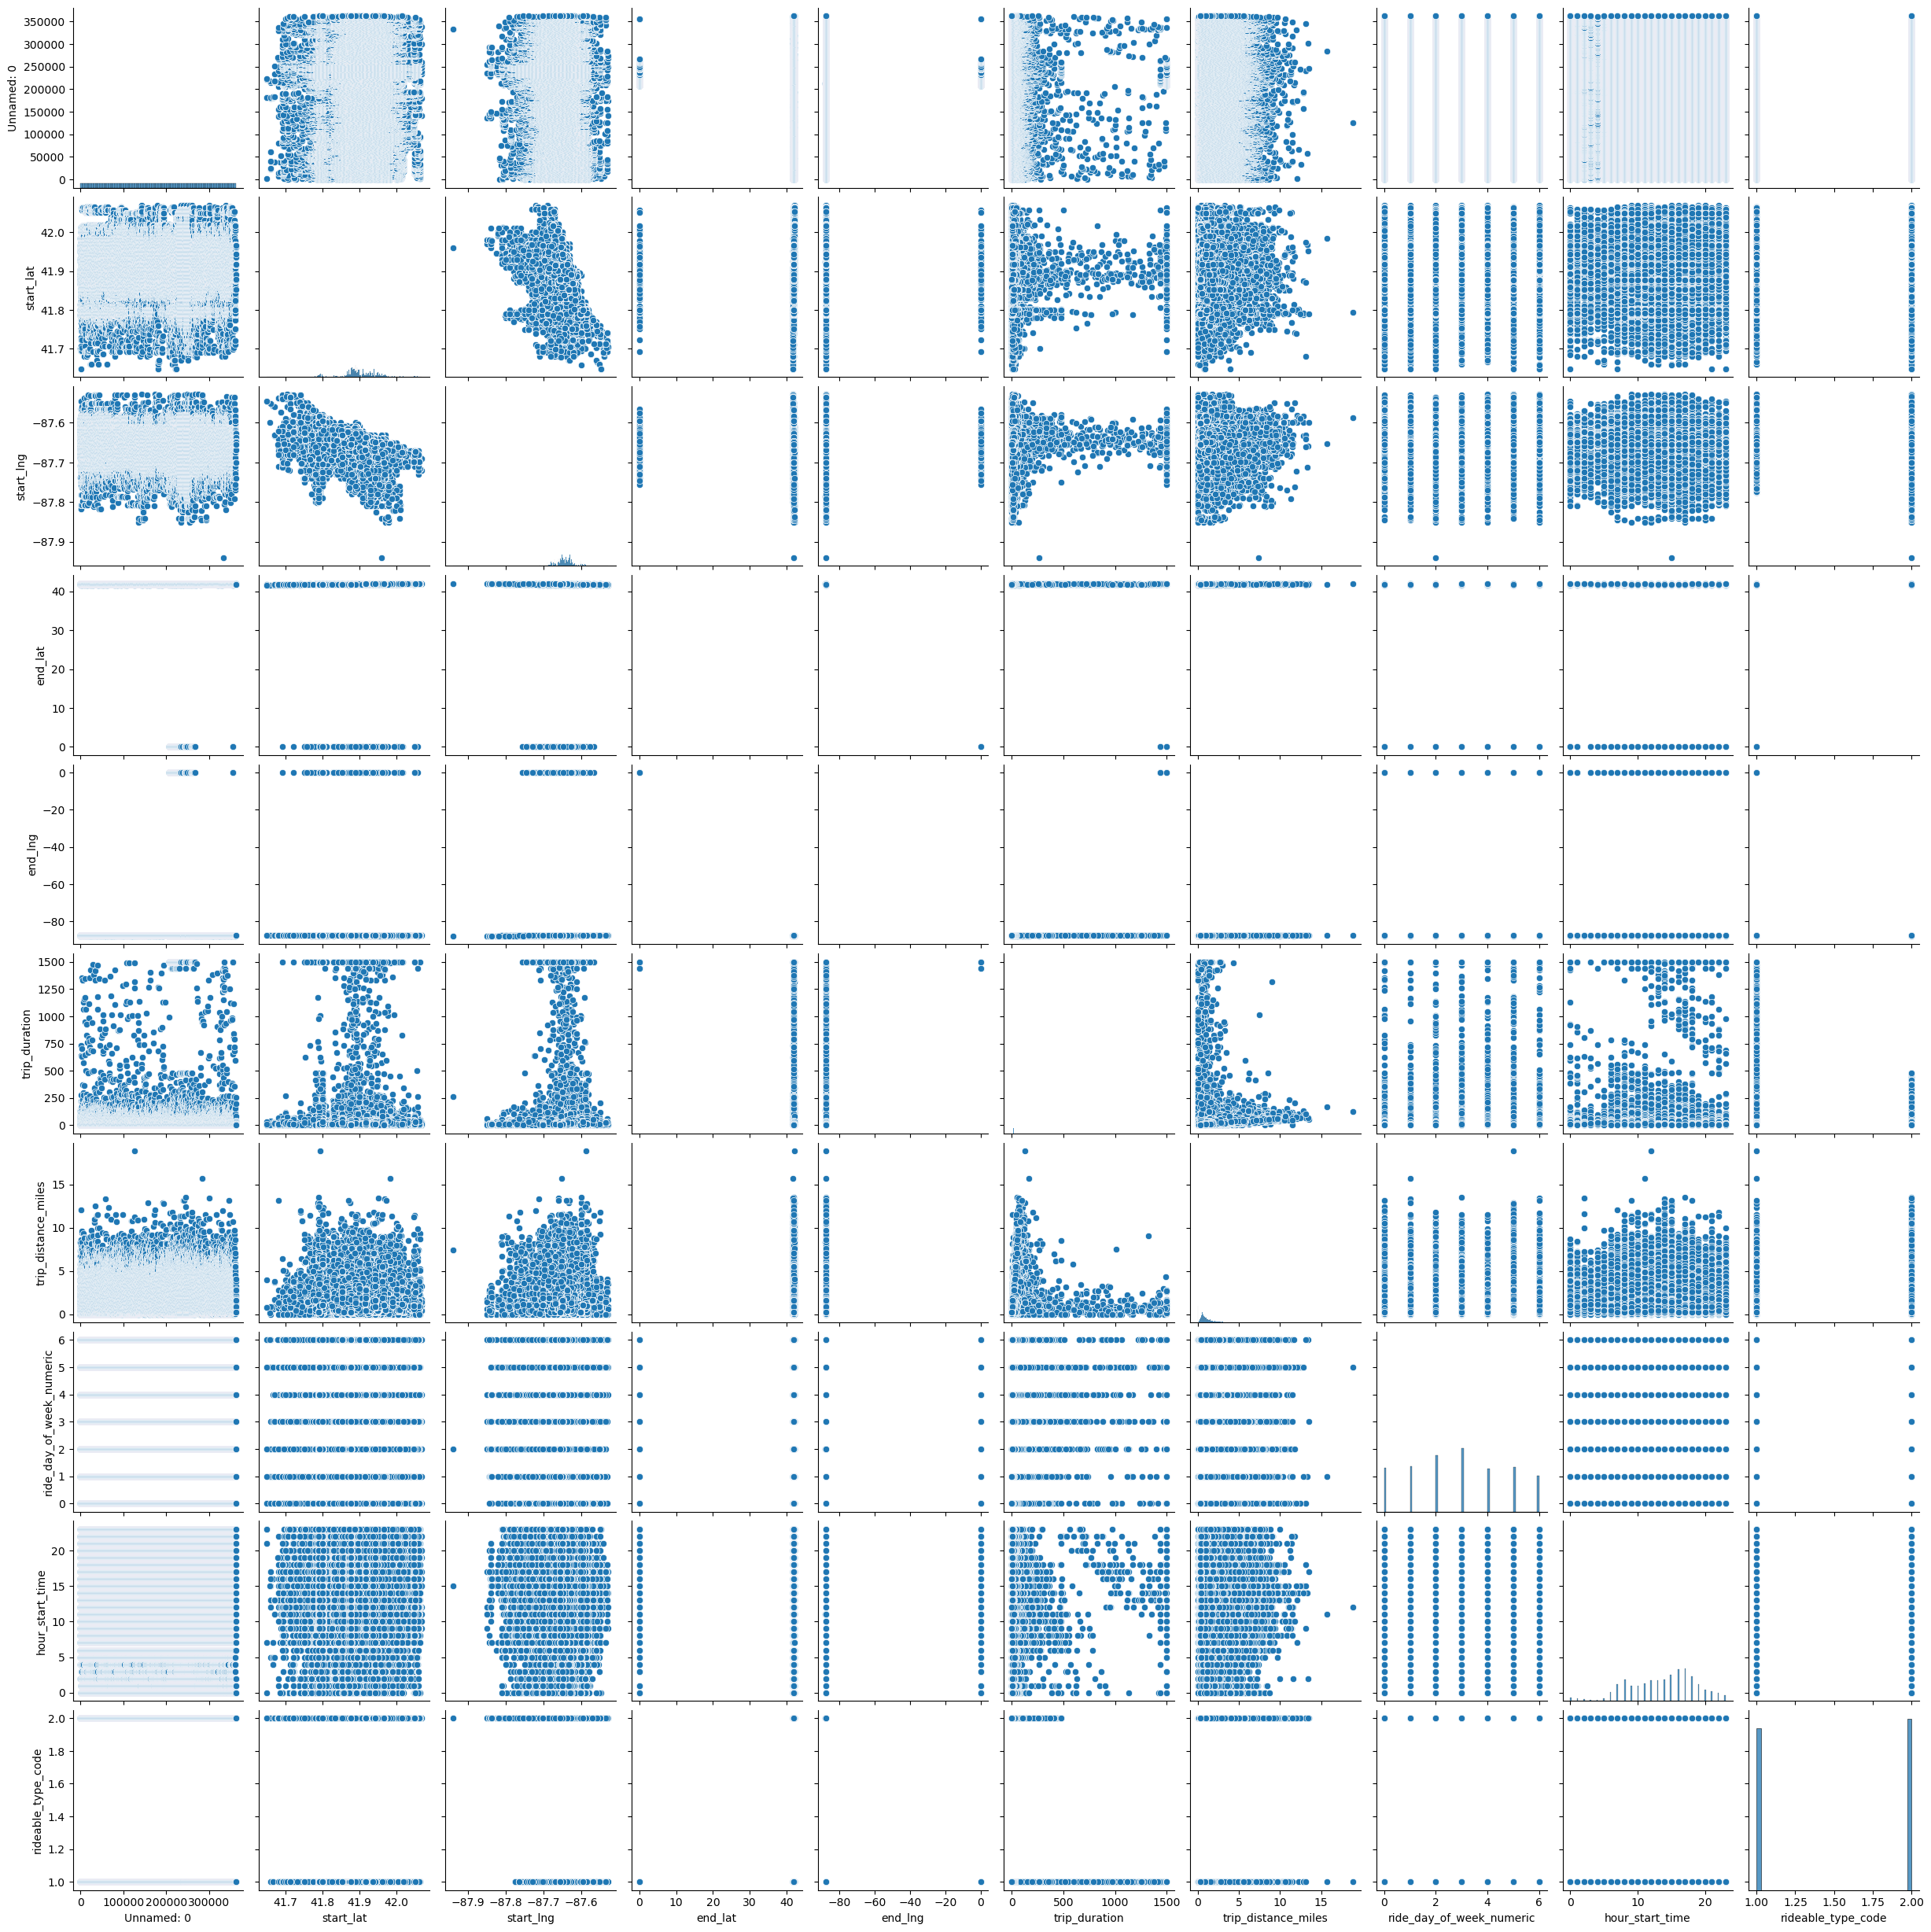

In [28]:
#Create a pairplot of all variables
g = sns.pairplot(df)

In [29]:
#Relationships to explore >> 
#(1) trip duration & distance: there are a lot of 0 duration rides why is this? There are also many 0 distance rides but low duration. 
#You would expect values to skew to the right, the higher the duration, the higher the distance. High duration and 0 miles can be a round trip
#(2) trip duration & start time: there is some relationshiop here. Are trips that start at a certain time shorter?
#These could be work trips vs leisure trips. Helps plan for demand
#(3) trip duration &rideable type: 1-electric bikes have longer trips
#(4) trip distance & day of week: days 2+6 are longer distance days
#(5) trip distance + type: 1 - electric riders travel longer distances 


In [30]:
df.columns

Index(['Unnamed: 0', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'trip_duration', 'trip_distance_miles',
       'trip_date_start', 'trip_date_end', 'start_time', 'end_time',
       'ride_day_of_week', 'ride_day_of_week_numeric', 'hour_start_time',
       'rideable_type_code'],
      dtype='object')

6- Create a Categorical Plot

In [31]:
#Exploring the relationship between start time and trip duration
#creating MORNING, AFTERNOON, AND EVENING CATEGORIES

/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='hour_start_time', ylabel='Count'>

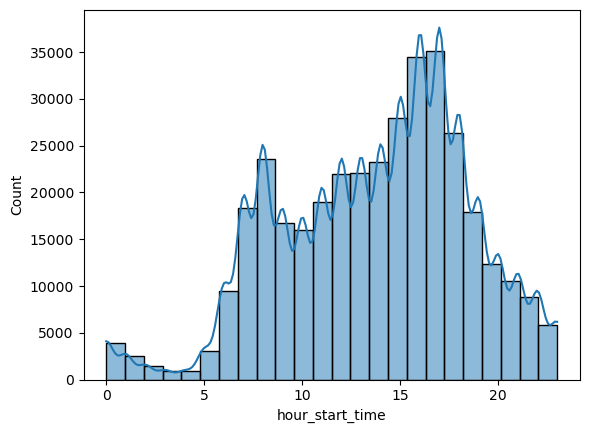

In [32]:
sns.histplot(df['hour_start_time'], bins = 24, kde = True)

In [33]:
df.loc[(df['hour_start_time'] >= 5) & (df['hour_start_time'] < 12), 'time_of_day'] = 'morning'
df.loc[(df['hour_start_time'] >= 12) & (df['hour_start_time'] < 17), 'time_of_day'] = 'afternoon'
df.loc[(df['hour_start_time'] >= 17) & (df['hour_start_time'] < 24), 'time_of_day'] = 'evening'
df.loc[(df['hour_start_time'] >= 0) & (df['hour_start_time'] < 5), 'time_of_day'] = 'early_morning'


In [34]:
df['time_of_day'].value_counts(dropna=False)

time_of_day
afternoon        129678
evening          116826
morning          106189
early_morning      9771
Name: count, dtype: int64

/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


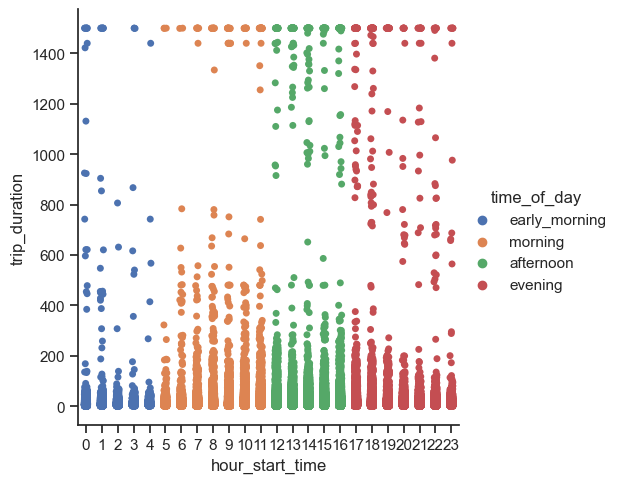

In [35]:
# Create a categorical plot in seaborn using the hour start time categories created above
#Even though the relationship is not very strong, graph shows that longer trips are more frequent in the afternoon than morning or early morning. 
#Evening also sees some longer distance trips. The morning sees shorter trips.

sns.set(style="ticks")
g = sns.catplot(x="hour_start_time", y="trip_duration", hue="time_of_day", data=df)

In [46]:
plt.savefig(os.path.join(path,'scatterplot_starttime_duration.png'))

<Figure size 640x480 with 0 Axes>

Answering some of the questions in my previous assignment 

In [36]:
#Calculating average trip duration in minutes

In [47]:
lessthan60mins_duration['trip_duration'].mean()

10.670326015567138

In [49]:
high_duration['trip_duration'].mean()

156.10025527964726

In [39]:
df['trip_duration'].mean()

13.833354484859186

In [40]:
#Which bike is more popular?
df['rideable_type'].value_counts()

rideable_type
electric_bike    186337
classic_bike     176127
Name: count, dtype: int64

In [41]:
#Do most users have memberships or are they casual bikers?
df['member_casual'].value_counts()

member_casual
member    264103
casual     98361
Name: count, dtype: int64

In [42]:
df.to_csv(os.path.join(path,'df_cleaned.csv'))

In [43]:
sub_nomissingbikes.to_csv(os.path.join(path,'df_nolostbikes.csv'))

In [44]:
high_duration.to_csv(os.path.join(path,'df_high_duration.csv'))